<a href="https://colab.research.google.com/github/nicolebermudez26/examen-software-desarrollo-q/blob/main/Introducci%C3%B2n_a_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV

OpenCV es una biblioteca libre de visión artificial originalmente desarrollada por Intel. OpenCV significa Open Computer Vision.

https://colab.research.google.com/notebooks/io.ipynb

https://colab.research.google.com/drive/1OSES8eo2UcHrC2pWntOTaTk3VinEkWG_#scrollTo=MfJA1BUlOhCu

Aprende OpenCV en 3 horas

https://www.youtube.com/watch?v=WQeoO7MI0Bs

##Lectura de imagenes

##Leer imagen desde archivo

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
#cargar la imagen desde archivo con imread
img = cv2.imread("lena.png")


In [ ]:
#cv2.imshow("Lena Soderberg" ,img)
cv2_imshow(img)

##leer imagen desde url

In [ ]:
from skimage import io

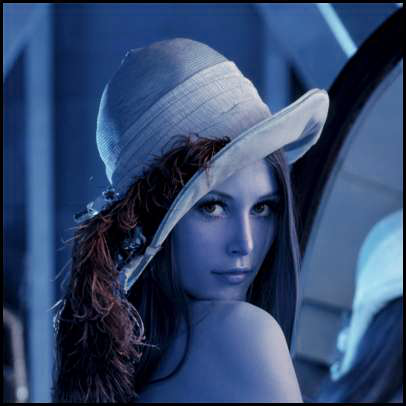

In [ ]:
Url ="http://4.bp.blogspot.com/_C0zZQr6CvcM/TN2mHeO5a1I/AAAAAAAAMSA/nCxqMgWsPB8/s1600/197211_Lenna_Sj%2525F6%2525F6blom_CF_L.jpg"
image = io.imread(Url)
cv2_imshow(image)

##LEER VIDEO

In [ ]:
import cv2
frameWidth = 640
frameHeight = 480
cap = cv2.VideoCapture("Resources/test_ video.mp4")
while True:
  success, img = cap.read()
  img = cv2.resize(img, (frameWidth, frameHeight))
  cv2.imshow("Result", img)
    if cv2.waitKey(1) and 0xFF == ord('q'):
break

##Leer Webcam

In [ ]:
import cv2 
frameWidth = 640
frameHeight = 480

In [ ]:
cap = cv2.VideoCapture(0)

In [ ]:
cap.set(3,frameWidth)
cap.set(4,frameheigth)

In [ ]:
while True:
  success, img=cap.read()
  cv2_imshow(img)

#FUNCIONES BASICAS

In [21]:
import cv2
import numpy as np

https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

In [22]:
img = cv2.imread("lena.png")
kernel = np.ones((5,5),np.uint8)

In [23]:
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2_imshow(imgGray)


In [24]:
imgBlur = cv2.GaussianBlur(imgGray,(7,7),0)
#cv2_imshow(imgBlur)

In [ ]:
final_frame = cv2.hconcat((imgGray, imgBlur))
cv2_imshow(final_frame)

In [ ]:
imgCanny = cv2.Canny(img,150,200)
final_frame = cv2.hconcat((imgGray, imgCanny))
cv2_imshow(final_frame)

In [ ]:
imgDialation = cv2.dilate(imgCanny,kernel,iterations=1)
final_frame = cv2.hconcat((imgGray, imgDialation))
cv2_imshow(final_frame)

In [ ]:
imgEroded = cv2.erode(imgDialation,kernel,iterations=1)
final_frame = cv2.hconcat((imgGray, imgEroded))
cv2_imshow(final_frame)

##crop and resize

In [16]:
from google.colab.patches import cv2_imshow

In [17]:
import cv2 as cv
import numpy as np

In [18]:
img = cv.imread("lambo.png")
print(img.shape)


(462, 623, 3)


In [ ]:
#Resize 
imgResize = cv.resize(img,(800,600))
print(imgResize.shape)
cv2_imshow(imgResize)

In [ ]:
#Crop
x = 0
y = 0
h = 300
w = 200
crop_img = img[y:y+h, x:x+w]
cv2_imshow(crop_img)

##Shapes and Text

In [29]:
import cv2 as cv
import numpy as np

In [30]:
img = np.zeros((600,500,3),np.uint8)

In [ ]:
img[:] = 0,0,255
cv2_imshow(img)
#R  G  B
#2  1  0


In [ ]:
print(img.shape)

In [ ]:
cv.line(img,(0,0),(img.shape[1],img.shape[0]),(0,255,0),4)
cv2_imshow(img)

In [ ]:
alto = int(img.shape[0]/2)
cv.line(img,(0,0),(img.shape[1],alto),(0,255,0),4)

cv.line(img,(img.shape[1],alto),(0,img.shape[0]),(0,255,0),4)

cv2_imshow(img)

In [ ]:
cv.rectangle(img,(0,0),(250,350),(0,255,255),2)
cv2_imshow(img)

In [ ]:
cv.circle(img,(400,100),80,(255,0,255),5)
cv2_imshow(img)

In [ ]:
cv.putText(img," OPENCV  ",(300,200),cv.FONT_HERSHEY_COMPLEX,1,(155,150,0),3)
cv2_imshow(img)

**texto en negrita** ##Warp Perspective

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("cards.jpg")
 
width,height = 250,350
pts1 = np.float32([[111,219],[287,188],[154,482],[352,440]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
imgOutput = cv2.warpPerspective(img,matrix,(width,height))
cv2_imshow(img)
cv2_imshow(imgOutput)

#cv2.imshow("Image",img)
#cv2.imshow("Output",imgOutput)
#cv2.waitKey(0)

##Joining Images

In [ ]:
import cv2
import numpy as np
 
 
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver
 
img = cv2.imread('Resources/lena.png')
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
imgStack = stackImages(0.5,([img,imgGray,img],[img,img,img]))
 
# imgHor = np.hstack((img,img))
# imgVer = np.vstack((img,img))
#
# cv2.imshow("Horizontal",imgHor)
# cv2.imshow("Vertical",imgVer)
cv2.imshow("ImageStack",imgStack)
 
cv2.waitKey(0)

##Color Detection

In [ ]:
import cv2
import numpy as np
 
def empty(a):
    pass
 
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver
 
 
path = 'Resources/lambo.png'
cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars",640,240)
cv2.createTrackbar("Hue Min","TrackBars",0,179,empty)
cv2.createTrackbar("Hue Max","TrackBars",19,179,empty)
cv2.createTrackbar("Sat Min","TrackBars",110,255,empty)
cv2.createTrackbar("Sat Max","TrackBars",240,255,empty)
cv2.createTrackbar("Val Min","TrackBars",153,255,empty)
cv2.createTrackbar("Val Max","TrackBars",255,255,empty)
 
while True:
    img = cv2.imread(path)
    imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h_min = cv2.getTrackbarPos("Hue Min","TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
    v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
    v_max = cv2.getTrackbarPos("Val Max", "TrackBars")
    print(h_min,h_max,s_min,s_max,v_min,v_max)
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    mask = cv2.inRange(imgHSV,lower,upper)
    imgResult = cv2.bitwise_and(img,img,mask=mask)
 
 
    # cv2.imshow("Original",img)
    # cv2.imshow("HSV",imgHSV)
    # cv2.imshow("Mask", mask)
    # cv2.imshow("Result", imgResult)
 
    imgStack = stackImages(0.6,([img,imgHSV],[mask,imgResult]))
    cv2.imshow("Stacked Images", imgStack)
    cv2.waitKey(1)

*texto en cursiva*##Contour/Shape Detection

In [ ]:
import cv2
import numpy as np
 
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver
 
def getContours(img):
    contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        print(area)
        if area&gt;500:
            cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
 
            if objCor ==3: objectType ="Tri"
            elif objCor == 4:
                aspRatio = w/float(h)
                if aspRatio &gt;0.98 and aspRatio &amp;lt;1.03: objectType= "Square"
                else:objectType="Rectangle"
            elif objCor&gt;4: objectType= "Circles"
            else:objectType="None"
 
 
 
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(imgContour,objectType,
                        (x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.7,
                        (0,0,0),2)
 
 
path = 'Resources/shapes.png'
img = cv2.imread(path)
imgContour = img.copy()
 
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray,(7,7),1)
imgCanny = cv2.Canny(imgBlur,50,50)
getContours(imgCanny)
 
imgBlank = np.zeros_like(img)
imgStack = stackImages(0.8,([img,imgGray,imgBlur],
                            [imgCanny,imgContour,imgBlank]))
 
cv2.imshow("Stack", imgStack)
cv2.waitKey(0)

##Face Detection

In [ ]:
import cv2
 
faceCascade= cv2.CascadeClassifier("Resources/haarcascade_frontalface_default.xml")
img = cv2.imread('Resources/lena.png')
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
faces = faceCascade.detectMultiScale(imgGray,1.1,4)
 
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
 
cv2.imshow("Result", img)
cv2.waitKey(0)

**texto en negrita**###Virtual Paint

In [ ]:
import cv2
import numpy as np
frameWidth = 640
frameHeight = 480
cap = cv2.VideoCapture(1)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10,150)
 
myColors = [[5,107,0,19,255,255],
            [133,56,0,159,156,255],
            [57,76,0,100,255,255],
            [90,48,0,118,255,255]]
myColorValues = [[51,153,255],          ## BGR
                 [255,0,255],
                 [0,255,0],
                 [255,0,0]]
 
myPoints =  []  ## [x , y , colorId ]
 
def findColor(img,myColors,myColorValues):
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    count = 0
    newPoints=[]
    for color in myColors:
        lower = np.array(color[0:3])
        upper = np.array(color[3:6])
        mask = cv2.inRange(imgHSV,lower,upper)
        x,y=getContours(mask)
        cv2.circle(imgResult,(x,y),15,myColorValues[count],cv2.FILLED)
        if x!=0 and y!=0:
            newPoints.append([x,y,count])
        count +=1
        #cv2.imshow(str(color[0]),mask)
    return newPoints
 
def getContours(img):
    contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    x,y,w,h = 0,0,0,0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area>500:
            #cv2.drawContours(imgResult, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            x, y, w, h = cv2.boundingRect(approx)
    return x+w//2,y
 
def drawOnCanvas(myPoints,myColorValues):
    for point in myPoints:
        cv2.circle(imgResult, (point[0], point[1]), 10, myColorValues[point[2]], cv2.FILLED)
 
 
while True:
    success, img = cap.read()
    imgResult = img.copy()
    newPoints = findColor(img, myColors,myColorValues)
    if len(newPoints)!=0:
        for newP in newPoints:
            myPoints.append(newP)
    if len(myPoints)!=0:
        drawOnCanvas(myPoints,myColorValues)
 
 
    cv2.imshow("Result", imgResult)
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break

###Color Picker

In [ ]:
import cv2
import numpy as np
 
frameWidth = 640
frameHeight = 480
cap = cv2.VideoCapture(1)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
 
 
def empty(a):
    pass
 
cv2.namedWindow("HSV")
cv2.resizeWindow("HSV", 640, 240)
cv2.createTrackbar("HUE Min", "HSV", 0, 179, empty)
cv2.createTrackbar("HUE Max", "HSV", 179, 179, empty)
cv2.createTrackbar("SAT Min", "HSV", 0, 255, empty)
cv2.createTrackbar("SAT Max", "HSV", 255, 255, empty)
cv2.createTrackbar("VALUE Min", "HSV", 0, 255, empty)
cv2.createTrackbar("VALUE Max", "HSV", 255, 255, empty)
 
 
while True:
 
    success, img = cap.read()
    imgHsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
 
    h_min = cv2.getTrackbarPos("HUE Min", "HSV")
    h_max = cv2.getTrackbarPos("HUE Max", "HSV")
    s_min = cv2.getTrackbarPos("SAT Min", "HSV")
    s_max = cv2.getTrackbarPos("SAT Max", "HSV")
    v_min = cv2.getTrackbarPos("VALUE Min", "HSV")
    v_max = cv2.getTrackbarPos("VALUE Max", "HSV")
    print(h_min)
 
    lower = np.array(&amp;#91;h_min, s_min, v_min])
    upper = np.array(&amp;#91;h_max, s_max, v_max])
    mask = cv2.inRange(imgHsv, lower, upper)
    result = cv2.bitwise_and(img, img, mask=mask)
 
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    hStack = np.hstack(&amp;#91;img, mask, result])
    cv2.imshow('Horizontal Stacking', hStack)
    if cv2.waitKey(1) &amp;amp;&amp;amp; 0xFF == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()

##Document Scanner

In [ ]:
import cv2
import numpy as np
 
###################################
widthImg=540
heightImg =640
#####################################
 
cap = cv2.VideoCapture(1)
cap.set(10,150)
 
def preProcessing(img):
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray,(5,5),1)
    imgCanny = cv2.Canny(imgBlur,200,200)
    kernel = np.ones((5,5))
    imgDial = cv2.dilate(imgCanny,kernel,iterations=2)
    imgThres = cv2.erode(imgDial,kernel,iterations=1)
    return imgThres
 
def getContours(img):
    biggest = np.array([])
    maxArea = 0
    contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area&gt;5000:
            #cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            if area &gt;maxArea and len(approx) == 4:
                biggest = approx
                maxArea = area
    cv2.drawContours(imgContour, biggest, -1, (255, 0, 0), 20)
    return biggest
 
def reorder (myPoints):
    myPoints = myPoints.reshape((4,2))
    myPointsNew = np.zeros((4,1,2),np.int32)
    add = myPoints.sum(1)
    #print("add", add)
    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] = myPoints[np.argmax(add)]
    diff = np.diff(myPoints,axis=1)
    myPointsNew[1]= myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]
    #print("NewPoints",myPointsNew)
    return myPointsNew
 
def getWarp(img,biggest):
    biggest = reorder(biggest)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0, 0], [widthImg, 0], [0, heightImg], [widthImg, heightImg]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    imgOutput = cv2.warpPerspective(img, matrix, (widthImg, heightImg))
 
    imgCropped = imgOutput[20:imgOutput.shape[0]-20,20:imgOutput.shape[1]-20]
    imgCropped = cv2.resize(imgCropped,(widthImg,heightImg))
 
    return imgCropped
 
 
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver
 
while True:
    success, img = cap.read()
    img = cv2.resize(img,(widthImg,heightImg))
    imgContour = img.copy()
 
    imgThres = preProcessing(img)
    biggest = getContours(imgThres)
    if biggest.size !=0:
        imgWarped=getWarp(img,biggest)
        # imageArray = ([img,imgThres],
        #           [imgContour,imgWarped])
        imageArray = ([imgContour, imgWarped])
        cv2.imshow("ImageWarped", imgWarped)
    else:
        # imageArray = ([img, imgThres],
        #               [img, img])
        imageArray = ([imgContour, img])
 
    stackedImages = stackImages(0.6,imageArray)
    cv2.imshow("WorkFlow", stackedImages)
 
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break

##RECONOCER PLACAS


In [ ]:
import cv2
 
#############################################
frameWidth = 640
frameHeight = 480
nPlateCascade = cv2.CascadeClassifier("Resources/haarcascade_russian_plate_number.xml")
minArea = 200
color = (255,0,255)
###############################################
 
cap = cv2.VideoCapture("Resources/video12.mp4")
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10,150)
count = 0
 
while True:
    success, img = cap.read()
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    numberPlates = nPlateCascade.detectMultiScale(imgGray, 1.1, 10)
    for (x, y, w, h) in numberPlates:
        area = w*h
        if area >minArea:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)
            cv2.putText(img,"Number Plate",(x,y-5),
        cv2.FONT_HERSHEY_COMPLEX_SMALL,1,color,2)
        imgRoi = img[y:y+h,x:x+w]
        cv2.imshow("ROI", imgRoi)
    
    cv2.imshow("Result", img)
 
    if cv2.waitKey(1) and 0xFF == ord('s'):
        cv2.imwrite("Resources/Scanned/NoPlate_"+str(count)+".jpg",imgRoi)
        cv2.rectangle(img,(0,200),(640,300),(0,255,0),cv2.FILLED)
        cv2.putText(img,"Scan Saved",(150,265),cv2.FONT_HERSHEY_DUPLEX,
        2,(0,0,255),2)
        cv2.imshow("Result",img)
        cv2.waitKey(500)
        count +=1

https://www.youtube.com/watch?v=8rg_qi8mjjk

https://omes-va.com/reconocimiento-de-matriculas-vehiculares-opencv-pytesseract-ocr-python/

https://github.com/GabySol/OmesTutorials2020/tree/master/2%20Reconocimiento%20de%20placas%20vehiculares